# Calculating Isobaric Binary Phase Diagrams

These are a few examples of how to use Thermo-Calc TDB files to calculate isobaric binary phase diagrams.

Note that, at the time of writing, invariant reactions (three-phase 'regions' on binary diagrams) are not yet automatically detected so they
are not drawn on the diagram.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot

## Al-Zn (S. Mey, 1993)

The miscibility gap in the fcc phase is included in the Al-Zn diagram, shown below.

CPU times: user 1.72 s, sys: 39 ms, total: 1.76 s
Wall time: 1.83 s


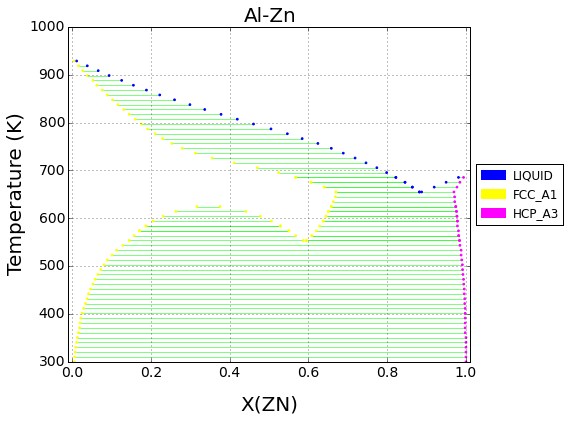

In [2]:
db_alzn = Database('alzn_mey.tdb')
my_phases_alzn = ['LIQUID', 'FCC_A1', 'HCP_A3']
fig = plt.figure(figsize=(9,6))
%time ax = binplot(db_alzn, ['AL', 'ZN', 'VA'] , my_phases_alzn, 'X(ZN)', 300, 1000, ax=plt.gca())

## Al-Fe (M.Seiersten et al., 1991)

CPU times: user 56.3 s, sys: 1.68 s, total: 58 s
Wall time: 57.9 s


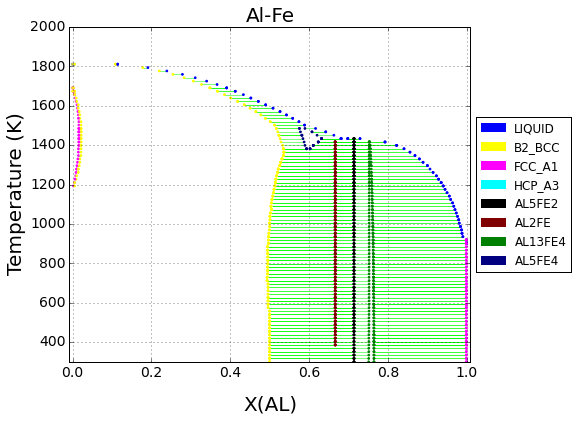

In [3]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'B2_BCC', 'FCC_A1', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL13FE4', 'AL5FE4']

fig = plt.figure(figsize=(9,6))
pdens = [{'B2_BCC': 20000}, 2000]
%time ax = binplot(db_alfe, ['AL', 'FE', 'VA'] , my_phases_alfe, 'X(AL)', 300, 2000, steps=100, pdens=pdens, ax=fig.gca())
plt.show()

## Al-Ni (N. Dupin et al., 2001)

pycalphad DEBUG 2015-03-30 17:13:22,003 [__init__ 44] Model of AL3NI1 has components {'NI', 'AL'}
pycalphad DEBUG 2015-03-30 17:13:22,126 [energy_surf 210] vacancy_indices: None
pycalphad DEBUG 2015-03-30 17:13:22,151 [__init__ 44] Model of AL3NI2 has components {'NI', 'AL', 'VA'}
pycalphad DEBUG 2015-03-30 17:13:22,480 [energy_surf 210] vacancy_indices: None
pycalphad DEBUG 2015-03-30 17:13:24,815 [__init__ 44] Model of AL3NI5 has components {'NI', 'AL'}
pycalphad DEBUG 2015-03-30 17:13:24,954 [energy_surf 210] vacancy_indices: None
pycalphad DEBUG 2015-03-30 17:13:25,054 [__init__ 44] Model of BCC_B2 has components {'NI', 'VA', 'AL'}
pycalphad DEBUG 2015-03-30 17:13:26,033 [energy_surf 210] vacancy_indices: [2, 2, 0]
pycalphad DEBUG 2015-03-30 17:14:00,487 [__init__ 44] Model of FCC_L12 has components {'NI', 'AL', 'VA'}
pycalphad DEBUG 2015-03-30 17:14:02,228 [energy_surf 210] vacancy_indices: None
pycalphad DEBUG 2015-03-30 17:14:09,714 [__init__ 44] Model of LIQUID has components {

temperature: 300.0


QhullError: Qhull error

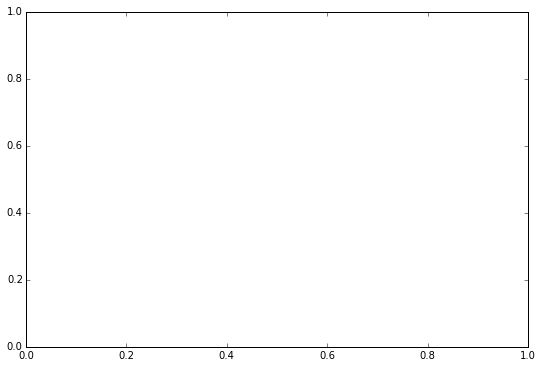

In [5]:
db_alni = Database('NI_AL_DUPIN_2001.TDB')
my_phases_alni = ['LIQUID', 'FCC_L12', 'BCC_B2', 'AL3NI5', 'AL3NI2', 'AL3NI1']
fig = plt.figure(figsize=(9,6))
pdens = [{'BCC_B2': 2000}, 2000]
from pycalphad.log import debug_mode
debug_mode()
%time ax = binplot(db_alni, ['AL', 'NI', 'VA'] , my_phases_alni, 'X(AL)', 300.0, 2000.0, steps=100, pdens=pdens, ax=fig.gca())

ZeroDivisionError: float division by zero

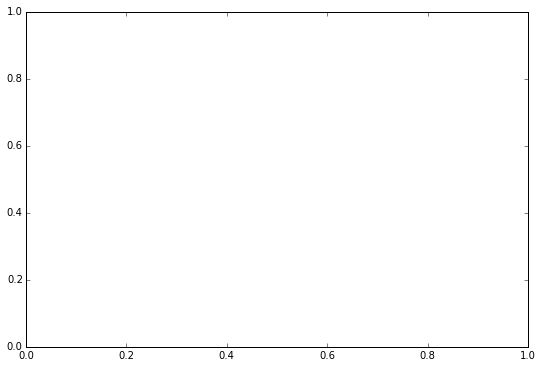

In [14]:
from pycalphad import energy_surf
import numpy as np
import matplotlib.patches as mpatches
colorlist = {}

# colors from Junwei Huang, March 21 2013
# exclude green and red because of their special meaning on the diagram
ColorValues=["0000FF", "FFFF00", "FF00FF", "00FFFF", "000000", 
        "800000", "008000", "000080", "808000", "800080", "008080", "808080", 
        "C00000", "00C000", "0000C0", "C0C000", "C000C0", "00C0C0", "C0C0C0", 
        "400000", "004000", "000040", "404000", "400040", "004040", "404040", 
        "200000", "002000", "000020", "202000", "200020", "002020", "202020", 
        "600000", "006000", "000060", "606000", "600060", "006060", "606060", 
        "A00000", "00A000", "0000A0", "A0A000", "A000A0", "00A0A0", "A0A0A0", 
        "E00000", "00E000", "0000E0", "E0E000", "E000E0", "00E0E0", "E0E0E0"]
M=len(ColorValues)

phasecount = 0
legend_handles = []
for phase in my_phases_alni:
    phase = phase.upper()
    colorlist[phase] = "#"+ColorValues[np.mod(phasecount,M)]
    legend_handles.append(mpatches.Patch(color=colorlist[phase], label=phase))
    phasecount = phasecount + 1

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
%time nrg_df = energy_surf(db_alni, ['AL', 'NI', 'VA'], my_phases_alni, T=1000.0)
#nrg_df.to_excel('b2.xlsx')
group_df = nrg_df.groupby('Phase')
for phase, phase_df in group_df:
    #if phase == 'BCC_B2':
    #    columns = [x for x in phase_df.columns.values if (phase in x) ]
    #    columns.append('GM')
    #    columns.append('X(AL)')
    #    print(phase_df[columns])
    ax = phase_df.plot(kind='scatter', x='X(AL)', y='GM', ax=ax, color=colorlist[phase.upper()], s=1, xlim=(0,1), ylim=(-11e4, -3e4))
ax = ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))

## Nb-Re (X. L. Liu et al., 2013)

CPU times: user 15.3 s, sys: 760 ms, total: 16.1 s
Wall time: 16.1 s


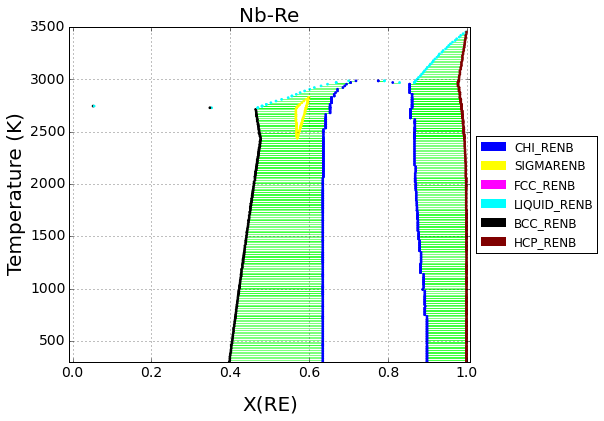

In [10]:
db_nbre = Database('nbre_liu.tdb')
my_phases_nbre = ['CHI_RENB', 'SIGMARENB', 'FCC_RENB', 'LIQUID_RENB', 'BCC_RENB', 'HCP_RENB']
fig = plt.figure(figsize=(9,6))
# chi phase needs extra point density to get smooth boundaries; everything else can be low
pdens = [{'CHI_RENB':4000}, 2000]
%time ax = binplot(db_nbre, ['NB', 'RE'] , my_phases_nbre, 'X(RE)', 300, 3500, steps=200, pdens=pdens, ax=fig.gca())

# Calculating Energy Surfaces of Binary Systems

It is very common in CALPHAD modeling to directly examine the Gibbs energy surface of all the constituent phases in a system.

Below we show how the Gibbs energy of all phases may be calculated as a function of composition at a given temperature (2800 K).

Note that the chi phase has additional, internal degrees of freedom which allow it to take on multiple states for a given
overall composition. Only the low-energy states are relevant to calculating the equilibrium phase diagram.

In the future this code will be rolled into a pycalphad routine so that it is simpler for the user.

CPU times: user 1.35 s, sys: 0 ns, total: 1.35 s
Wall time: 1.34 s


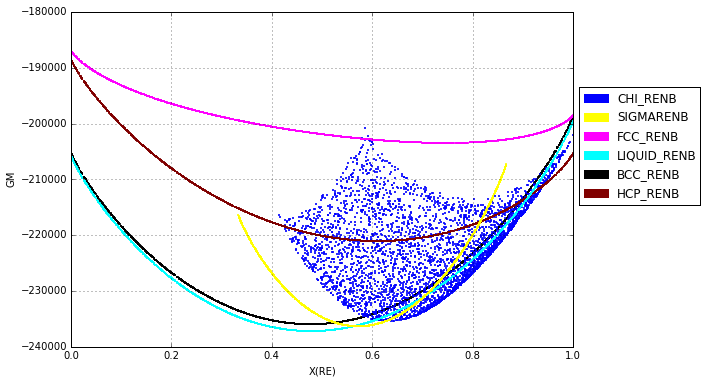

In [6]:
from pycalphad import energy_surf
import numpy as np
import matplotlib.patches as mpatches
colorlist = {}

# colors from Junwei Huang, March 21 2013
# exclude green and red because of their special meaning on the diagram
ColorValues=["0000FF", "FFFF00", "FF00FF", "00FFFF", "000000", 
        "800000", "008000", "000080", "808000", "800080", "008080", "808080", 
        "C00000", "00C000", "0000C0", "C0C000", "C000C0", "00C0C0", "C0C0C0", 
        "400000", "004000", "000040", "404000", "400040", "004040", "404040", 
        "200000", "002000", "000020", "202000", "200020", "002020", "202020", 
        "600000", "006000", "000060", "606000", "600060", "006060", "606060", 
        "A00000", "00A000", "0000A0", "A0A000", "A000A0", "00A0A0", "A0A0A0", 
        "E00000", "00E000", "0000E0", "E0E000", "E000E0", "00E0E0", "E0E0E0"]
M=len(ColorValues)

phasecount = 0
legend_handles = []
for phase in my_phases_nbre:
    phase = phase.upper()
    colorlist[phase] = "#"+ColorValues[np.mod(phasecount,M)]
    legend_handles.append(mpatches.Patch(color=colorlist[phase], label=phase))
    phasecount = phasecount + 1

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
# chi phase needs extra point density to get smooth boundaries
pdens = [{'CHI_RENB':4000}, 1000]
pdens = 2000
%time nrg_df = energy_surf(db_nbre, ['RE', 'NB'], my_phases_nbre, T=2800.0, pdens=pdens)
#print(nrg_df)
group_df = nrg_df.groupby('Phase')
for phase, phase_df in group_df:
    ax = phase_df.plot(kind='scatter', x='X(RE)', y='GM', ax=ax, color=colorlist[phase.upper()], s=1, xlim=(0,1))
ax = ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))